In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

**Load Dataset**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Bootcamp Dibimbing/iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Data Preprocessing**

In [4]:
data.drop(columns=['Id'], inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Exploratory Data Analysis**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Inisialisasi Fitur dan Label**

In [8]:
X = data.drop('Species', axis=1)
y = data['Species']

**Split Data**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((120, 4), (30, 4))

**Modelling Random Forest**

In [10]:
from sklearn.ensemble import RandomForestClassifier

#Membuat Model Random Forest
rf = RandomForestClassifier(random_state=42)

#Melatih Model Random Forest
rf.fit(X_train, y_train)

#Melakukan prediksi label dengan data testing
y_pred = rf.predict(X_test)

**Evaluation**

In [11]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\n Akurasi Model : {0:.2f}%'. format(accuracy_score(y_test, y_pred)* 100))

Confusion matrix

 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

 Akurasi Model : 100.00%


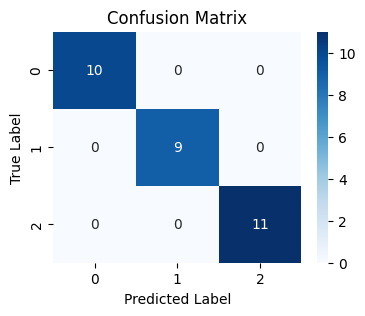

In [12]:
#Visualisasi Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Prediction**

In [13]:
data_test = pd.DataFrame(data={
    "SepalLengthCm" : [5.1],
    "SepalWidthCm"  : [3.5],
    "PetalLengthCm" : [1.4],
    "PetalWidthCm"  : [0.2]
})

data_test[0:1]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2


In [14]:
pred_test = rf.predict(data_test[0:1])
pred_test[0]

'Iris-setosa'